## Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



## Importing Dataset

In [16]:
path = './archive/CO2 Emissions_Canada.csv'
df = pd.read_csv(path)

In [3]:
pd.DataFrame(df)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


## Data Analysis and Preprocessing

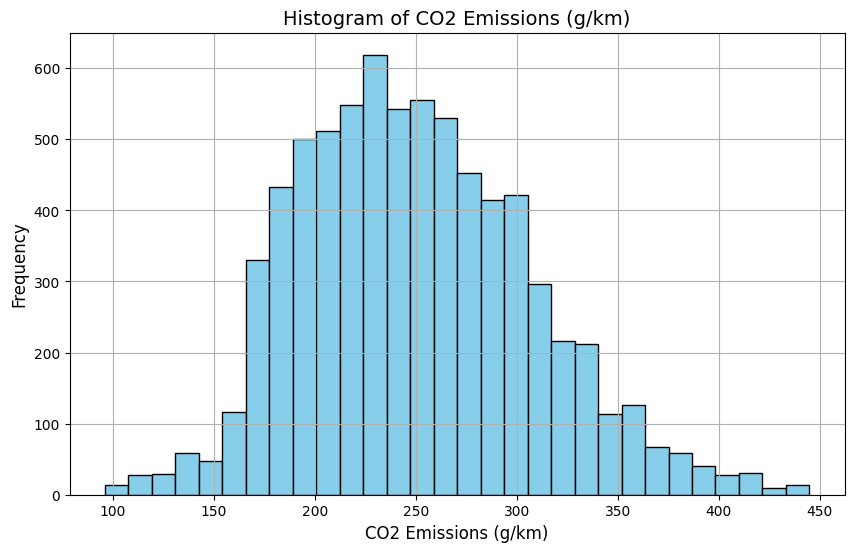

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Removing outlier
X = df['CO2 Emissions(g/km)'][df['CO2 Emissions(g/km)']<450]


plt.figure(figsize=(10, 6))
plt.hist(X, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CO2 Emissions (g/km)', fontsize=14)
plt.xlabel('CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


## Direct Approach

### Linear Regression

In [8]:
# Filter out rows with CO2 Emissions above 450
df = df[df['CO2 Emissions(g/km)'] < 450]

# Separate features and target
X = df[['Engine Size(L)', 'Cylinders', 
        'Fuel Consumption City (L/100 km)', 
        'Fuel Consumption Hwy (L/100 km)', 
        'Fuel Consumption Comb (L/100 km)', 
        'Fuel Consumption Comb (mpg)']]

y = df['CO2 Emissions(g/km)']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred_test = model.predict(X_test)

# 5. Performance Metrics
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 11.17
Mean Squared Error (MSE): 293.21
Root Mean Squared Error (RMSE): 17.12
R-squared (R2): 0.91


### Random forest

In [9]:
# Filter out rows with CO2 Emissions above 450
df = df[df['CO2 Emissions(g/km)'] < 450]

# Separate features and target
X = df[['Engine Size(L)', 'Cylinders', 
        'Fuel Consumption City (L/100 km)', 
        'Fuel Consumption Hwy (L/100 km)', 
        'Fuel Consumption Comb (mpg)']]

y = df['CO2 Emissions(g/km)']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred_test = model.predict(X_test)

# Performance Metrics
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Total data: ", len(X))
print("Train data: ", len(X_train))
print("Test data: ", len(X_test))

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')



Total data:  7362
Train data:  5889
Test data:  1473
Mean Absolute Error (MAE): 2.96
Mean Squared Error (MSE): 62.78
Root Mean Squared Error (RMSE): 7.92
R-squared (R2): 0.98


## Federated Learning Approach

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Hyperparameters
n_estimators = 50  # Number of trees in Random Forest
test_size = 0.2    # Test split size
n_clients = 4      # Number of local models
random_state = 42  # Seed for reproducibility

# Filter and prepare dataset
X = df[['Engine Size(L)', 'Cylinders', 
        'Fuel Consumption City (L/100 km)', 
        'Fuel Consumption Hwy (L/100 km)', 
        'Fuel Consumption Comb (mpg)']]
y = df['CO2 Emissions(g/km)']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test for direct and federated model evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

# Direct Random Forest model on entire training set
direct_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
direct_model.fit(X_train, y_train)
y_pred_direct = direct_model.predict(X_test)

# Direct model performance
mse_direct = mean_squared_error(y_test, y_pred_direct)
rmse_direct = np.sqrt(mse_direct)
mae_direct = mean_absolute_error(y_test, y_pred_direct)
r2_direct = r2_score(y_test, y_pred_direct)

print(f'Direct Model - Mean Absolute Error (MAE): {mae_direct:.2f}')
print(f'Direct Model - Mean Squared Error (MSE): {mse_direct:.2f}')
print(f'Direct Model - Root Mean Squared Error (RMSE): {rmse_direct:.2f}')
print(f'Direct Model - R-squared (R2): {r2_direct:.2f}')

# Federated Learning Setup
# Shuffle and split the X_train, y_train data into 4 parts for local models
X_shuffled, y_shuffled = shuffle(X_train, y_train, random_state=random_state)
split_size = len(X_shuffled) // n_clients
X_splits = [X_shuffled[i*split_size:(i+1)*split_size] for i in range(n_clients)]
y_splits = [y_shuffled.iloc[i*split_size:(i+1)*split_size] for i in range(n_clients)]

# Train local models
local_models = []
for i in range(n_clients):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_splits[i], y_splits[i])
    local_models.append(model)

# Federated Aggregation
# Average the predictions of the local models on the test set to form the global model predictions
y_pred_federated = np.mean([model.predict(X_test) for model in local_models], axis=0)

# Global model performance
mse_federated = mean_squared_error(y_test, y_pred_federated)
rmse_federated = np.sqrt(mse_federated)
mae_federated = mean_absolute_error(y_test, y_pred_federated)
r2_federated = r2_score(y_test, y_pred_federated)

print("\nFederated Global Model Performance:")
print(f'Mean Absolute Error (MAE): {mae_federated:.2f}')
print(f'Mean Squared Error (MSE): {mse_federated:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_federated:.2f}')
print(f'R-squared (R2): {r2_federated:.2f}')

# Comparison of Direct Model vs Federated Global Model
print("\nComparison of Direct Model and Federated Global Model:")
print(f'Direct Model - MAE: {mae_direct:.2f}, Federated Model - MAE: {mae_federated:.2f}')
print(f'Direct Model - MSE: {mse_direct:.2f}, Federated Model - MSE: {mse_federated:.2f}')
print(f'Direct Model - RMSE: {rmse_direct:.2f}, Federated Model - RMSE: {rmse_federated:.2f}')
print(f'Direct Model - R2: {r2_direct:.2f}, Federated Model - R2: {r2_federated:.2f}')


Direct Model - Mean Absolute Error (MAE): 2.96
Direct Model - Mean Squared Error (MSE): 62.78
Direct Model - Root Mean Squared Error (RMSE): 7.92
Direct Model - R-squared (R2): 0.98

Federated Global Model Performance:
Mean Absolute Error (MAE): 4.20
Mean Squared Error (MSE): 89.87
Root Mean Squared Error (RMSE): 9.48
R-squared (R2): 0.97

Comparison of Direct Model and Federated Global Model:
Direct Model - MAE: 2.96, Federated Model - MAE: 4.20
Direct Model - MSE: 62.78, Federated Model - MSE: 89.87
Direct Model - RMSE: 7.92, Federated Model - RMSE: 9.48
Direct Model - R2: 0.98, Federated Model - R2: 0.97
